# MAC0209 - Análise dos dados do Physics Toolbox 

# Introdução

Este JN apresenta a modelagem e simulação de uma caminhada usando dados obtidos de um acelerômetro de celular. O modelo adotado para é a equação diferencial de um movimento uniforme:

$ \frac{dx}{dt} = v$, em que $v$ é constante.

O algoritmo de Euler é implementado como:

$ x1 = x0 + v * dt$, em que $x0 = x(t)$ e $x1 = x(t+dt)$.



# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def dataPath():
  # complete seu path abaixo depois do My Drive/ Coloque um / no final.
  path = '/content/drive/My Drive/SEU-CAMINHO-VEM-AQUI/'
  return(path)


def myPrintFloat(s,f):
  print(s, "{:.2f}".format(f))

def printSeparador():
  print("\n\n===============================\n\n")

# converte m/s para km/h
def ms2kh(m):
  return(3.6*m)

# converte km/h em minutos por km
def kh2Pace(kmh):
  hkm = 60*1.0/kmh
  mins = int(hkm)
  segs = int( (hkm - mins) * 60 )
  return(mins,segs)

def euler(x0, t0, tf, velocidadeMediaMS, dt):
  xatual  = x0
  tatual = t0
  x = []
  t = []

  while(tatual <= tf):
    x.append(xatual)
    t.append(tatual)
    xatual = xatual + (velocidadeMediaMS*dt)
    tatual += dt  
  return(t,x)

# Main





       time     gFx     gFy     gFz    TgF
0  0.012062 -0.0352  0.9970  0.1400  1.007
1  0.012578 -0.0352  0.9970  0.1400  1.007
2  0.012832 -0.0354  0.9975  0.1407  1.008
3  0.013105 -0.0362  0.9992  0.1478  1.011
4  0.013307 -0.0330  0.9966  0.1593  1.010






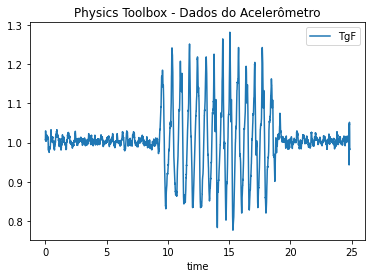

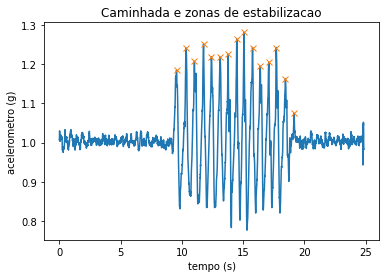

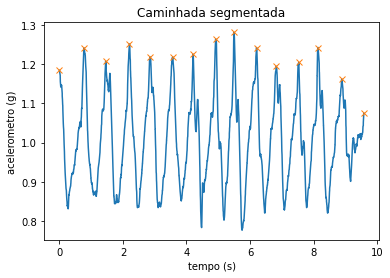





Sumario de dados do experimento 


Numero de passos:  15.00
Distancia percorrida (m):  13.50
Tempo transcorrido (segundos) 9.58
Velocidade media (m/s) 1.41
Velocidade media (km/h) 5.08
Pace medio (min/km): 11 minutos 49 segundos por km






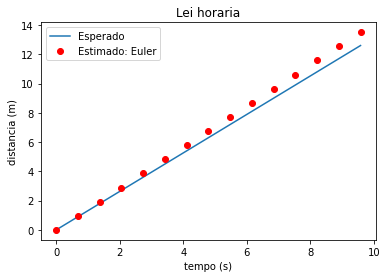

In [7]:
def main():

  workPath = dataPath()

  fileName = workPath + '2023-03-2016.08.26-caminhadaCEC.csv'

  data = pd.read_csv(fileName, sep=';', encoding='utf-8')
  data_top = data.head() 

  printSeparador()

  print(data_top) 

  printSeparador()

  data.plot(x="time", y="TgF", title='Physics Toolbox - Dados do Acelerômetro')
  plt.show()
  
  tgf = data["TgF"]
  tempo = data["time"]
  dt = np.average(np.diff(tempo))

  peaks, _ = find_peaks(tgf, distance=150, prominence=0.1)

  printSeparador()
  
  plt.figure()
  plt.plot(tempo,tgf)
  plt.plot(tempo[peaks], tgf[peaks], "x")
  plt.title('Caminhada e zonas de estabilizacao')
  plt.xlabel('tempo (s)')
  plt.ylabel('acelerometro (g)')
  plt.show()

  # segmentacao da caminhada, ignorando as fases de estabilizacao do protocolo de aquisicao de dados

  shift = 1
  primeiroPasso = peaks[0] - shift
  ultimoPasso = peaks[-1] + shift

  caminhada = tgf[primeiroPasso:ultimoPasso]
  caminhada = np.asarray(caminhada)

  caminhadaTempo = tempo[primeiroPasso:ultimoPasso]
  caminhadaTempo = np.asarray(caminhadaTempo)
  caminhadaTempo -= caminhadaTempo[0]

  peaks, _ = find_peaks(caminhada, distance=150, prominence=0.1)

  peaks = list(peaks)
  peaks = [0] + peaks + [caminhada.size-1]

  fatorConversao = 0.9 # tamanho de cada passo em metros
  nPassos = len(peaks)
  distanciaTotal = nPassos * fatorConversao
  tempoTotal = caminhada.size * dt #segundos
  velocidadeMediaMS = distanciaTotal / tempoTotal
  velocidadeMediaKMH = ms2kh(velocidadeMediaMS)
  paceMins, paceSegs = kh2Pace(velocidadeMediaKMH)

  # tempo medio de cada passo
  tempoPasso = np.average(np.diff(caminhadaTempo[peaks]))

  printSeparador()

  plt.figure()
  plt.plot(caminhadaTempo, caminhada)
  plt.plot(caminhadaTempo[peaks], caminhada[peaks], "x")
  plt.title('Caminhada segmentada')
  plt.xlabel('tempo (s)')
  plt.ylabel('acelerometro (g)')
  plt.show()

  printSeparador()

  print('Sumario de dados do experimento \n\n')
  myPrintFloat('Numero de passos: ', nPassos)
  myPrintFloat('Distancia percorrida (m): ', distanciaTotal)
  myPrintFloat('Tempo transcorrido (segundos)', tempoTotal)
  myPrintFloat('Velocidade media (m/s)', velocidadeMediaMS)
  myPrintFloat('Velocidade media (km/h)', velocidadeMediaKMH)
  paceString = 'Pace medio (min/km): ' + str(paceMins) + ' minutos ' + str(paceSegs) + ' segundos por km'
  print(paceString)

  printSeparador()

  # construcao da lei horaria ground-truth e simulada usando as solucoes analitica e por Euler

  ind = np.arange(0,nPassos) 
  x = fatorConversao * ind
  t = tempoPasso * ind
  x0 = x[0]
  t0 = t[0]
  tf = t[-1]

  tEuler, xEuler = euler(x0, t0, tf, velocidadeMediaMS, tempoPasso)

  plt.figure()
  plt.plot(t,x, label='Esperado')
  plt.plot(tEuler,xEuler, 'ro', label='Estimado: Euler')
  plt.title('Lei horaria')
  plt.xlabel('tempo (s)')
  plt.ylabel('distancia (m)')
  ax = plt.gca()
  ax.legend()
  plt.show()

  printSeparador()

main()



# Exercícios



## Reescreva o programa acima a partir de uma célula vazia, para ter certeza que compreendeu todos os passos.

In [ ]:
# versao limpa para vc reprogramar

def main():

  workPath = dataPath()

  fileName = workPath + '2023-03-2016.08.26-caminhadaCEC.csv'

  data = pd.read_csv(fileName, sep=';', encoding='utf-8')
  data_top = data.head() 

  printSeparador()

  print(data_top) 

  printSeparador()

  data.plot(x="time", y="TgF", title='Physics Toolbox - Dados do Acelerômetro')
  plt.show()
  
# complete aqui

  printSeparador()
  
  plt.figure()
  plt.plot(tempo,tgf)
  plt.plot(tempo[peaks], tgf[peaks], "x")
  plt.title('Caminhada e zonas de estabilizacao')
  plt.xlabel('tempo (s)')
  plt.ylabel('acelerometro (g)')
  plt.show()

  # segmentacao da caminhada, ignorando as fases de estabilizacao do protocolo de aquisicao de dados


# complete aqui

  printSeparador()

  plt.figure()
  plt.plot(caminhadaTempo, caminhada)
  plt.plot(caminhadaTempo[peaks], caminhada[peaks], "x")
  plt.title('Caminhada segmentada')
  plt.xlabel('tempo (s)')
  plt.ylabel('acelerometro (g)')
  plt.show()

  printSeparador()

  print('Sumario de dados do experimento \n\n')
  myPrintFloat('Numero de passos: ', nPassos)
  myPrintFloat('Distancia percorrida (m): ', distanciaTotal)
  myPrintFloat('Tempo transcorrido (segundos)', tempoTotal)
  myPrintFloat('Velocidade media (m/s)', velocidadeMediaMS)
  myPrintFloat('Velocidade media (km/h)', velocidadeMediaKMH)
  paceString = 'Pace medio (min/km): ' + str(paceMins) + ' minutos ' + str(paceSegs) + ' segundos por km'
  print(paceString)

  printSeparador()

  # construcao da lei horaria ground-truth e simulada usando as solucoes analitica e por Euler

  # complete aqui

  # reprograme o novoEuler
  tEuler, xEuler = novoEuler(x0, t0, tf, velocidadeMediaMS, tempoPasso)

  # crie uma funcao com a solucao analitica. Plotea sobreposta.

  plt.figure()
  plt.plot(t,x, label='Esperado')
  plt.plot(tEuler,xEuler, 'ro', label='Estimado: Euler')
  plt.plot(tAnalitica,xAnalitica, 'ro', label='Estimado: Analitica')
  plt.title('Lei horaria')
  plt.xlabel('tempo (s)')
  plt.ylabel('distancia (m)')
  ax = plt.gca()
  ax.legend()
  plt.show()

  printSeparador()

main()


## O programa acima assume que cada passo tem distância constante definida pelo fatorConversao = 0.9. Modifique o valor de conversão e compare os diferentes resultados para diferentes valores.


## Modifique o programa para permitir fatorConversao proporcional ao valor produzido pelo acelerômetro. Acima que quanto maior o valor do acelerômetro, maior a distância coberta pelo passo.

## Realize um experimento de aquisição de dados usando o Physics Toolbox e analise os dados usando seus programas. Use uma trena e marque a distância percorrida. Modifique seus programas para usar a distância real em metros, além de estimar o tamanho dos passos. Compare os resultados.